<a href="https://colab.research.google.com/github/lucaspn017/quantitative_datas/blob/main/Analisando_tend%C3%AAncias_de_imigra%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# A tabela em estudo mostra o número de imigrações dos habitantes de vários países, em direção ao Canadá, assim como os seus respectivos continentes.

In [ ]:
imigrantes = pd.read_csv("/content/drive/MyDrive/Curso 2 - Criando gráficos com Python/imigrantes_canada.csv")

In [ ]:
imigrantes.set_index("País", inplace=True)
#Tornando a coluna "País" o índice e aplicando alteração na própria tabela.

In [ ]:
imigrantes.info()
#Não será necessário tratar valores nulos.
imigrantes

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afeganistão to Zimbábue
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Continente  195 non-null    object
 1   Região      195 non-null    object
 2   1980        195 non-null    int64 
 3   1981        195 non-null    int64 
 4   1982        195 non-null    int64 
 5   1983        195 non-null    int64 
 6   1984        195 non-null    int64 
 7   1985        195 non-null    int64 
 8   1986        195 non-null    int64 
 9   1987        195 non-null    int64 
 10  1988        195 non-null    int64 
 11  1989        195 non-null    int64 
 12  1990        195 non-null    int64 
 13  1991        195 non-null    int64 
 14  1992        195 non-null    int64 
 15  1993        195 non-null    int64 
 16  1994        195 non-null    int64 
 17  1995        195 non-null    int64 
 18  1996        195 non-null    int64 
 19  1997        195 non-null    int64 
 20  

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,1406,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,12,...,161,140,122,133,128,211,160,174,217,2985


In [ ]:
#Criando uma variável para melhor tratamento dos dados.
anos = list(map(str, range(1980,2014)))#Não consideramos o último

#Objetivo: Verificar as tendências de imigração do Brasil para o Canadá

In [ ]:
#A função .loc necessita de dois parâmetros,
#sendo um deles, uma sequência de rótulos.
brasil = imigrantes.loc["Brasil", anos]
brasil

,Brasil
1980,211
1981,220
1982,192
1983,139
1984,145
1985,130
1986,205
1987,244
1988,394
1989,650


In [ ]:
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes':brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


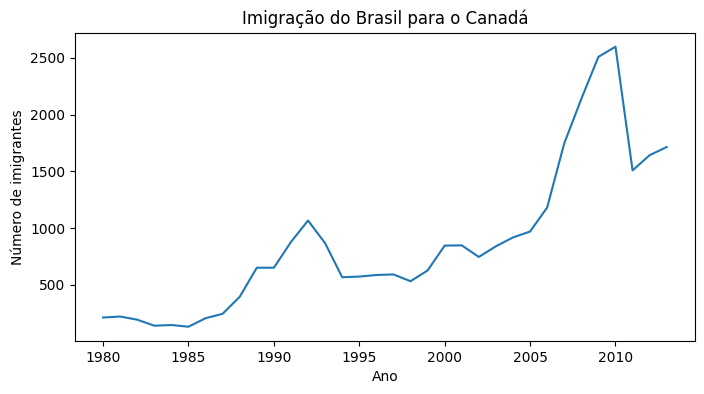

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(dados_brasil["ano"], dados_brasil["imigrantes"])
plt.title('Imigração do Brasil para o Canadá')
plt.xlabel('Ano')
plt.ylabel('Número de imigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

#Comparando o número de imigrantes do Brasil e da Argentina, para o Canadá.
    

In [ ]:
comparacao = imigrantes.loc[['Brasil','Argentina'],anos]
#Devemos transpor a tabela para tornar o
#nome das colunas como sendo o dos países.
comparacao =comparacao.T

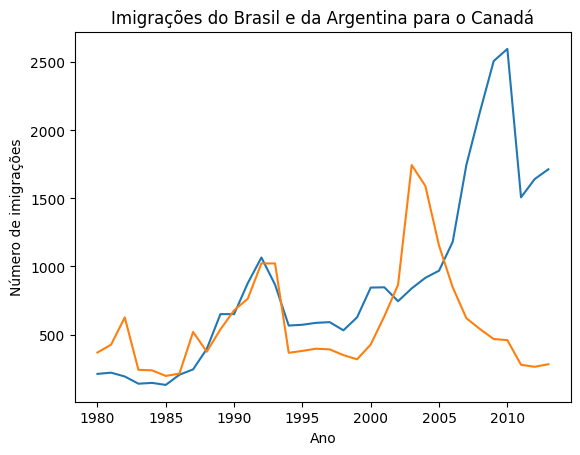

In [ ]:
plt.plot(comparacao['Brasil'], label='Brasil')
plt.plot(comparacao['Argentina'], label='Argentina')
plt.title('Imigrações do Brasil e da Argentina para o Canadá')
plt.xlabel('Ano')
plt.ylabel('Número de imigrações')
plt.xticks(['1980','1985','1990', '1995','2000','2005','2010'])
## Se colocar dois plts consecutivos, eles irão se sobrepor.
plt.show()

#Vamos utilizar figuras para ter acesso a novas funcionalidades.

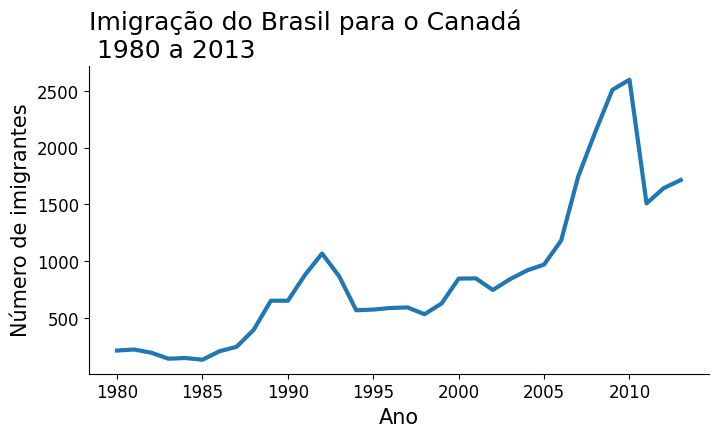

In [ ]:
fig, ax= plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3)
ax.set_title('Imigração do Brasil para o Canadá\n 1980 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=15)
ax.set_ylabel('Número de imigrantes', fontsize=15)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('Número de imigrantes do Brasil para o Canadá.png', dpi=300, transparent=False, bbox_inches='tight' )

plt.show()

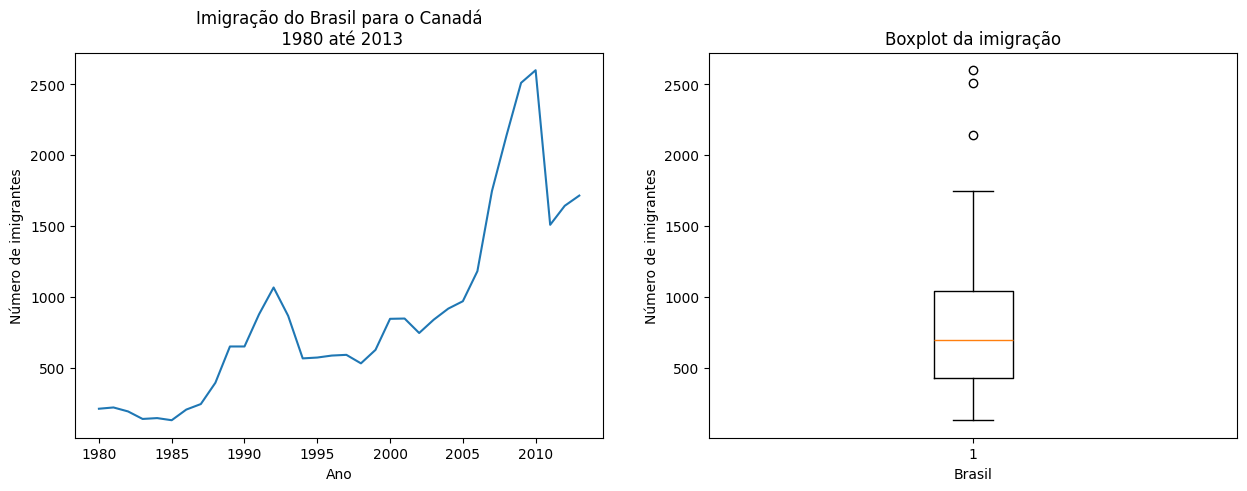

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n 1980 até 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))

axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Boxplot da imigração')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')

plt.show()

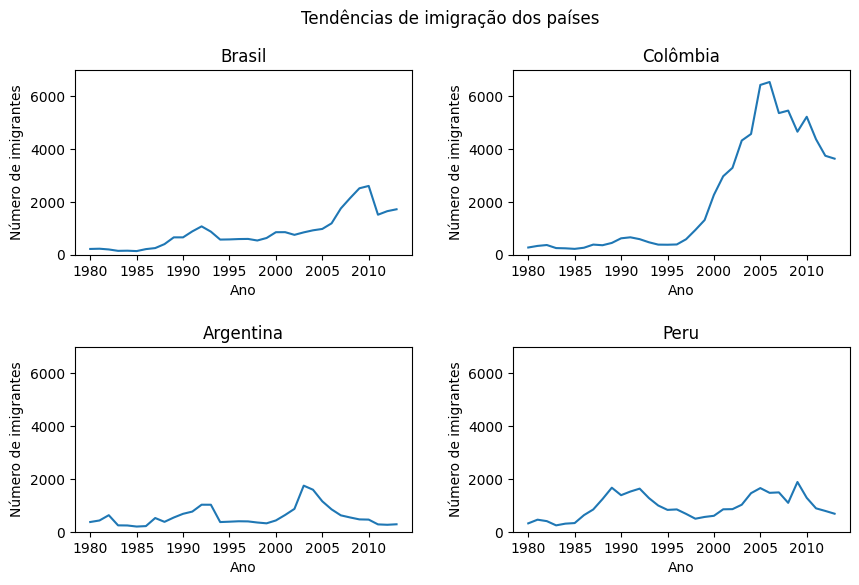

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle("Tendências de imigração dos países")

axs[0,0].plot(imigrantes.loc["Brasil", anos])
axs[0,0].set_title("Brasil")

axs[0,1].plot(imigrantes.loc['Colômbia', anos])
axs[0,1].set_title("Colômbia")

axs[1,0].plot(imigrantes.loc["Argentina", anos])
axs[1,0].set_title("Argentina")

axs[1,1].plot(imigrantes.loc["Peru", anos])
axs[1,1].set_title("Peru")

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

for ax in axs.flat:
  ax.set_xlabel("Ano")
  ax.set_ylabel("Número de imigrantes")

ymin = 0
ymax = 7000

for ax in axs.ravel():
   ax.set_ylim(ymin, ymax)

plt.show()

# Verificando o número de imigrantes para os países da América Latina.

In [ ]:
america_sul = imigrantes.query('Região == "América do Sul"')
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


In [ ]:
america_sul_sorted = america_sul.sort_values('Total', ascending=True)

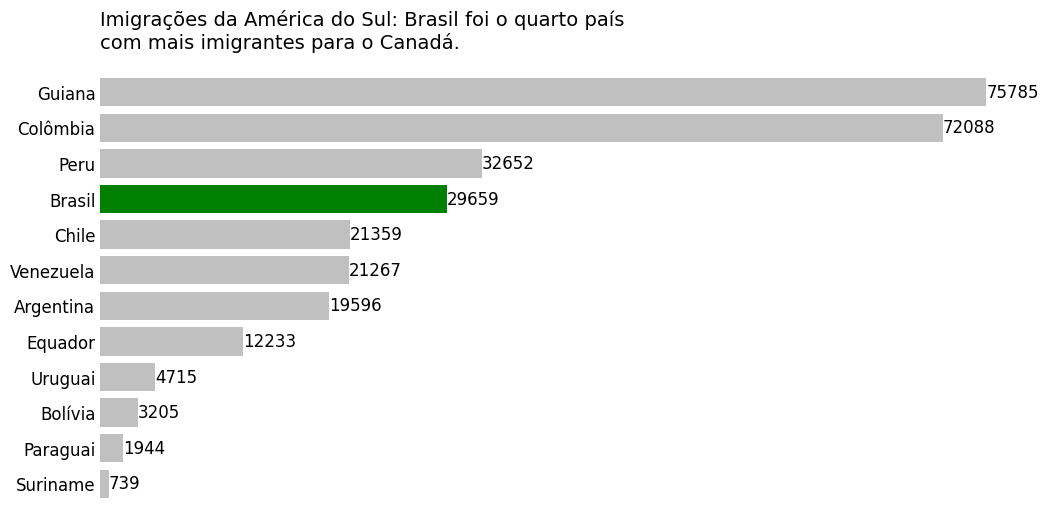

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
cores = []
for pais in america_sul_sorted.index:
  if pais=='Brasil':
    cores.append('green')
  else:
    cores.append('silver')

ax.barh(america_sul_sorted.index,america_sul_sorted['Total'], color = cores)
ax.set_title('Imigrações da América do Sul: Brasil foi o quarto país \ncom mais imigrantes para o Canadá.', fontsize=14, loc='left')
ax.set_xlabel('Número de imigrantes', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# Limpando o gráfico
# O primeiro parâmetro da função text indica onde o texto
# será adicionado em cada uma das barras.
for i, v in enumerate(america_sul_sorted['Total']):
  ax.text(v+20, i, str(v), color='black', fontsize=12, ha='left', va='center')

ax.set_frame_on(False)

ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

fig.savefig('Imigrações do Brasil comparativamente a outros.png', dpi=300, transparent=False, bbox_inches='tight')


plt.show()

In [ ]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


In [ ]:
sns.set_theme()
top_10 = imigrantes.sort_values('Total', ascending=False).head(10)


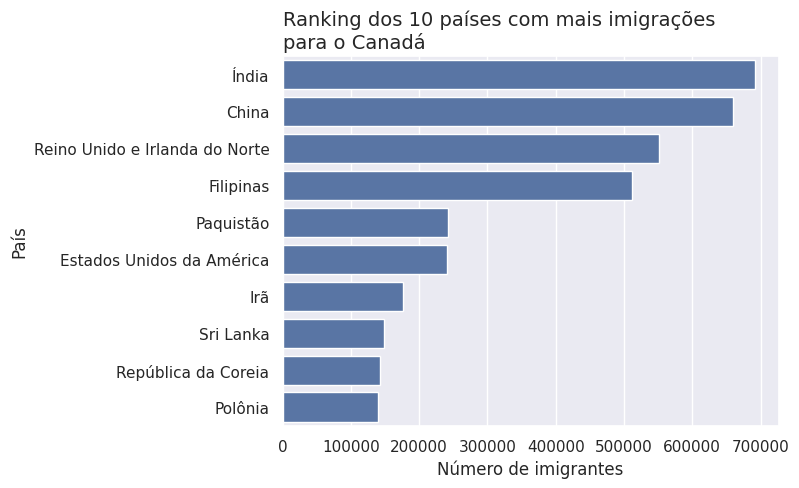

In [ ]:
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')
ax.set_title("Ranking dos 10 países com mais imigrações\npara o Canadá", loc='left', fontsize=14)
ax.set_xlabel('Número de imigrantes', loc='center')

plt.show()

# Atribuindo novas características ao gráfico.

In [ ]:
def gerar_palleta(palette):
  fig, ax = plt.subplots(figsize=(8,4))
  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)
  ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=18)
  ax.set_xlabel('Número de imigrantes', fontsize=14)
  ax.set_ylabel('')
  sns.despine()

  plt.show()

<ipython-input-21-82d45c1e5358>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


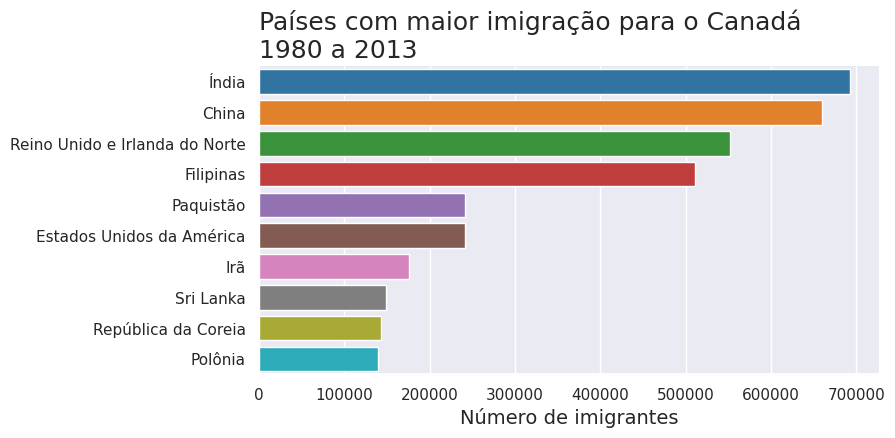

In [ ]:
gerar_palleta('tab10')
plt.show()

<ipython-input-21-82d45c1e5358>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


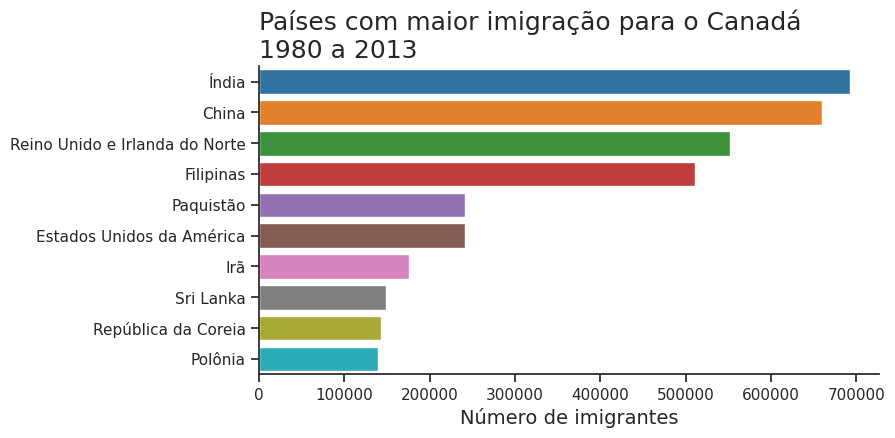

In [ ]:
sns.set_theme(style='ticks')
gerar_palleta('tab10')

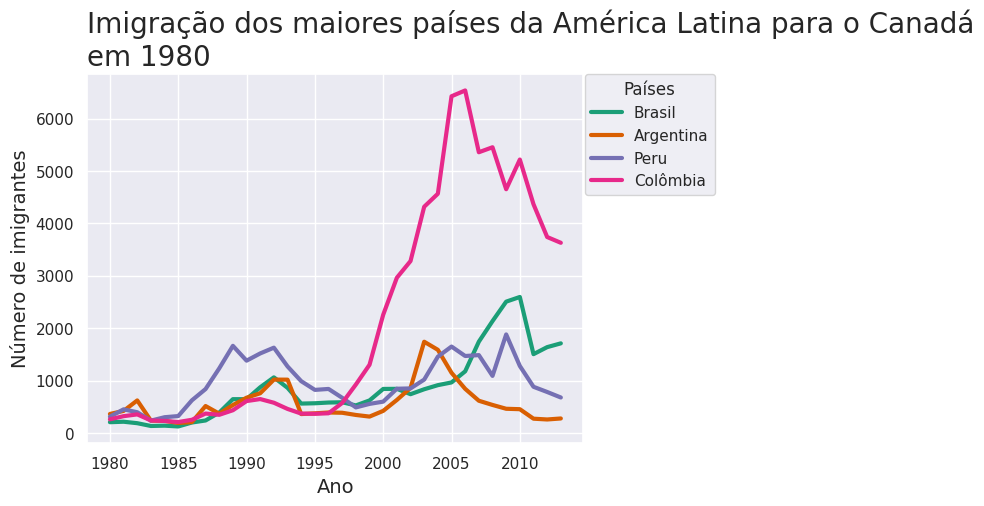

In [ ]:
sns.set_theme()
sns.set_palette('Dark2')

ax = sns.lineplot(imigrantes.loc['Brasil', anos], label='Brasil', lw=3)
ax = sns.lineplot(imigrantes.loc['Argentina', anos], label='Argentina', lw=3)
ax = sns.lineplot(imigrantes.loc['Peru', anos], label='Peru', lw=3)
ax = sns.lineplot(imigrantes.loc['Colômbia', anos], label='Colômbia', lw=3)

ax.set_title('Imigração dos maiores países da América Latina para o Canadá\nem 1980', loc='left', fontsize=20)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

ax.legend(title='Países', loc='upper right', bbox_to_anchor=(1.28,1.02))

plt.show()

#Aplicando interações

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_traces(line_color='blue', line_width=4)
fig.update_layout(width=1000, height=500,
                  xaxis={'tickangle':-45},
                  font_family='Arial',
                  font_size=14,
                  font_color='grey',
                  title_font_color='black',
                  title_font_size=22,
                  xaxis_title='Ano',
                  yaxis_title='Número de imigrantes')

fig.show()

In [ ]:
america_sul = america_sul.drop(['Continente', 'Região', 'Total'], axis=1)
america_sul_final = america_sul.T

In [ ]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País',
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013', markers=True)
fig.update_layout(
    xaxis={'tickangle':-45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes'
)


# Comportamento da evolução das imigrações da Argentina e do Brasil rumo ao Canadá.


In [ ]:
argentina = america_sul.loc['Argentina', anos]
argentina = {'ano':argentina.index.tolist(), 'imigrantes':argentina.values.tolist()}
dados_argentina = pd.DataFrame(argentina)

dados_ArgBrasil= america_sul_final[['Brasil', 'Argentina']].reset_index().rename(columns={'index':'Ano'})

for i in dados_ArgBrasil.columns:
  fig = go.Figure()
  fig.add_trace(
      go.Scatter(x=[dados_ArgBrasil['Ano'].iloc[0]], y=[dados_ArgBrasil[i].iloc[0]], mode='lines', name='Imigrantes', line=dict(width=4))
      )
  fig.update_layout(
      title= dict(
        text= f'<b>Imigração: {dados_ArgBrasil[i]} para o Canadá<br>no período de 1980 a 2013.</b>',
        x= 0.12,
        xanchor= 'left',
        font= dict(size=20)),
      )
  xaxis=dict(range=[1980,2013], autorange=False, title='<b>Ano<\b>'),
  yaxis=dict(range=[0,3000], autorange=False, title='<b>Número de imigrantes<\b>'),

  updatemenus=[dict(
      type='buttons',
      showactive=False,
      buttons=[dict(
          label='Play',
          method='animate',
          args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True }]
      )]
  )]
  a=0,
  a+=1,
  frames=[go.Frame(data=[go.Scatter(x=dados_ArgBrasil['ano'].iloc[:a+1], y=dados_ArgBrasil[i].iloc[:a+1])])],
  width=1000,
  height=500,


,Ano
0,1980
1,1981
2,1982
3,1983
4,1984
5,1985
6,1986
7,1987
8,1988
9,1989


"\nfor i in dados_ArgBrasil.columns:\n  fig = go.Figure()\n  fig.add_trace( \n      go.Scatter(x=[dados_ArgBrasil[i].index], y=[dados_ArgBrasil[i].values], mode='lines', name='Imigrantes', line=dict(width=4))\n      )\n  fig.update_layout(\n      title= dict(\n        text= f'<b>Imigração: {dados_ArgBrasil[i]} para o Canadá<br>no período de 1980 a 2013.</b>',\n        x= 0.12,\n        xanchor= 'left',\n        font= dict(size=20)),\n      )\n  xaxis=dict(range=[1980,2013], autorange=False, title='<b>Ano<\x08>'),\n  yaxis=dict(range=[0,3000], autorange=False, title='<b>Número de imigrantes<\x08>'),\n  \n  updatemenus=[dict(\n      type='buttons',\n      showactive=False,\n      buttons=[dict(\n          label='Play',\n          method='animate',\n          args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True }]\n      )]\n  )]\n  a=0, \n  a+=1,\n  frames=[go.Frame(data=[go.Scatter(x=dados_ArgBrasil[i].iloc[:a+1], y=dados_ArgBrasil.iloc[:a+1])])],\n  width=1000,\